In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Condition of Normality

In [48]:
temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                    3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42, 1.36, 
                    2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

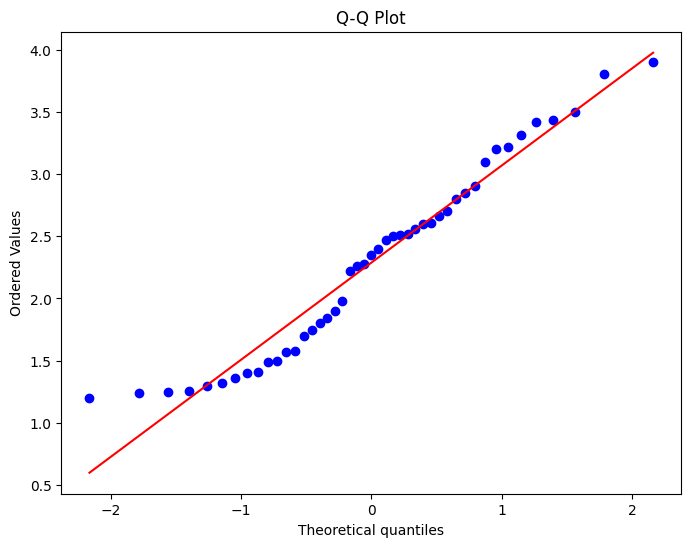

Shapiro-Wilk test p-value: 0.034019891172647476
The data follows a normal distribution.


In [49]:
from scipy.stats import probplot,shapiro 
# Q-Q plot
# Quantilte-Quantile Plot is plot between theoretical quantiles and quantiles of sample data. 
# If plot is straight line then we can conclude that sample is Normal.
plt.figure(figsize=(8, 6))
probplot(temp_winter, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Another way is :-

# Shapiro-Wilk test for normality
stat, p_value = shapiro(temp_winter)

# Check the p-value
alpha = 0.01  # 99% confidence level
print(f"Shapiro-Wilk test p-value: {p_value}")

if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

# Hypothesis Test for Population Mean 

### One Sample Z-test (when population standard deviation is known)

It is rarely the case when you know the population std and not the mean...but let's assume that is the case.

It is known from experience that for a certain E-commerce company the mean delivery time is 5 days with std 1.3 days 

New manager collects a random sample of 45 orders. The mean time comes out as 5.25 days.

Is there enough statistical evidence for the manager's apprehension that the mean delivery time of products is greater than 5 days ?

Level of Significance is set to 5%

### Let's write Null and Alternate Hypotheses

$H_{0}: \mu = 5$

$H_{a}: \mu > 5$

### Next step is to find the Z test statistic

In [50]:
mu,sigma = 5,1.3
x_bar = 5.25

test_stat = (x_bar - mu)/(sigma/np.sqrt(45))
test_stat

1.2900392177883402

The Z test statistic follows a standard normal distribution

Plotting the distribution of Z test statistic and see where the computed test statisitc lies in the plot.

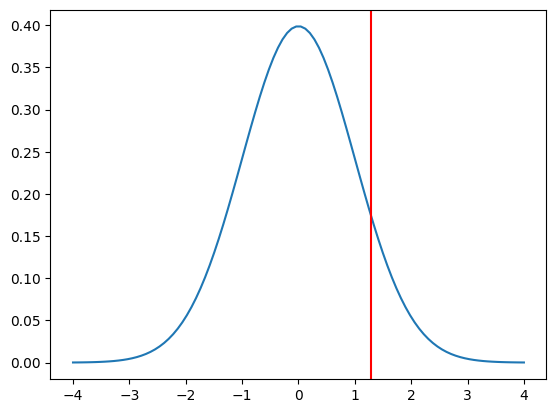

In [51]:
from scipy.stats import norm

x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x,0,1))
plt.axvline(test_stat, c='r')
plt.show()

What is the probability of getting the calculated value of test statistic or bigger in the above distribution ?

In [52]:
norm.sf(test_stat)

0.09851852092578695

Though the probability is very small (around 10%), is it significant enough to reject $H_{0}$ in favor of $H_{a}$ ?

### Introduction to Rejection Region and p-value

To determine whether to reject $H_{0}$ or not, we use either one of the following approaches:

Rejection Region Approach :-

1. We choose a value of level of significance ($\alpha$). 5% in this case

2. Then we find rejection region in plot

3. We reject $H_{0}$ if test statistic falls in rejection region. Else we don't reject $H_{0}$

In [53]:
critical_val = norm.ppf(1-0.05)
critical_val

1.6448536269514722

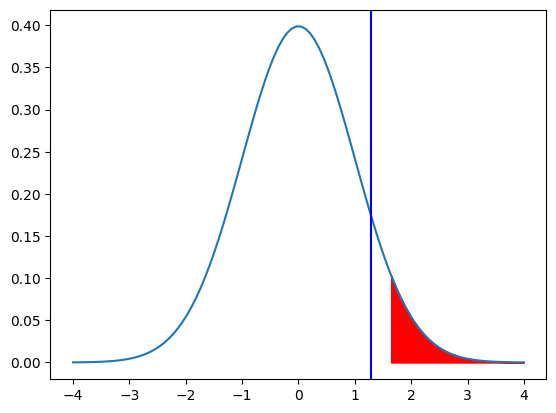

In [54]:
x = np.linspace(-4,4,100)
x1 = np.linspace(critical_val,4,100)
plt.plot(x, norm.pdf(x,0,1))
plt.axvline(test_stat, c='b')
plt.fill_between(x1, norm.pdf(x1,0,1), color='r')
plt.show()

Z test statistic doesn't lie in rejection region i.e., we don't have enough statistical evidence to reject $H_{0}$

p-value Approach :-

1. We choose a value of level of significance ($\alpha$). 5% in this case

2. Then we calculate the p-value

3. We reject $H_{0}$ if p-value $\leq$ $\alpha$. Else we fail to reject the null hypothesis.

In [55]:
p_value = norm.sf(test_stat)
p_value

0.09851852092578695

p-value is greater than level if significance. Hence we cannot reject $H_{0}$.

## One Tailed and Two Tailed

Suppose a soft-drink manufacturer's most selling product is 600 ml coke with a standard deviation of 50 ml.
A customer would like to test whether there is at least 600 ml coke in the bottle. He doubts that the amount of coke in bottle is less than 600 ml

### Null and Alternate Hypotheses are :-

$H_{0}$ : $\mu$ = 600

$H_{a}$ : $\mu$ < 600

However, the quality control team wants exactly 600 ml in the bottle. The team wants to ensure that the amount of coke in the bottle is not different from 600 ml.

### Null and Alternate Hypotheses are :-

$H_{0}$ : $\mu$ = 600

$H_{0}$ : $\mu$ $\ne$ 600

Thus, the choice of one-sided vs two-sided alternate hypotheses depends on the nature of the problem.

## Two-tailed Test

Suppose you have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

You intend to test whether the amount of coke in the bottle is not equal to/different from 600 ml using 5% level of significance.

Finding the test statistic

In [56]:
mu,sigma = 600,50
x_bar = 580

test_stat = (x_bar - mu)/(sigma/np.sqrt(36))
test_stat

-2.4

Let's use rejection region approach for two-tailed test

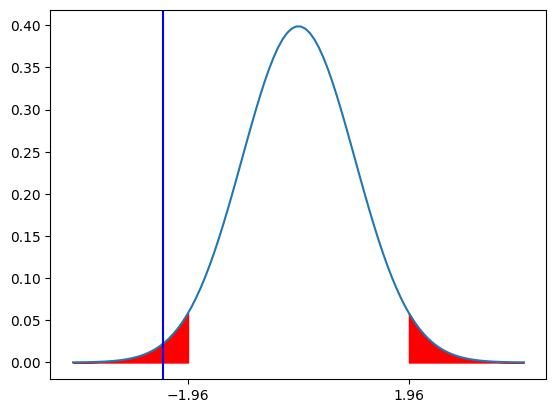

In [57]:
x = np.linspace(-4,4,100)
x1 = np.linspace(-4, norm.ppf(0.025), 100)
x2 = np.linspace(norm.ppf(1-0.025), 4, 100)

plt.plot(x,norm.pdf(x,0,1))
plt.fill_between(x1,norm.pdf(x1,0,1), color='r')
plt.fill_between(x2,norm.pdf(x2,0,1), color='r')
plt.axvline(test_stat, c='b')
plt.xticks([round(norm.ppf(0.025),2),round(norm.ppf(1-0.025),2)])
plt.show()

So, there is enough evidence to reject $H_{0}$

95% Confidence Interval for above would be (-1.96,1.96). Note that when we calculate confidence interval that implies a hypothesis testing using Two-tailed method. 

## One-tailed Test

Suppose you have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

You intend to test whether the amount of coke in the bottle is less than 600 ml using 5% level of significance.

Test Statistic would be same as above.

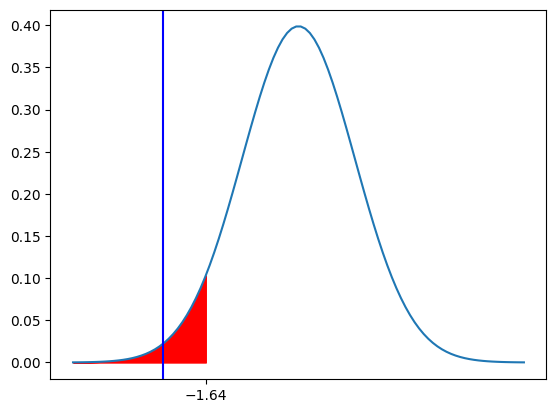

In [58]:
x = np.linspace(-4,4,100)
x1 = np.linspace(-4, norm.ppf(0.05), 100)

plt.plot(x,norm.pdf(x,0,1))
plt.fill_between(x1,norm.pdf(x1,0,1), color='r')
plt.axvline(test_stat, c='b')
plt.xticks([round(norm.ppf(0.05),2)])

plt.show()

So, there is enough evidence to reject $H_{0}$

# One Sample T-test for Population Mean $\mu$

A certain food aggregator ZYX is facing stiff competition from it's rival during pandemic. To retain business, ZYX is advertising that, within radius of 5km where restaurants are placed, it can deliver in 40 minutes or less on average. The delivery time of 25 randomly selected deliveries are in CSV file.

Assuming the delivery distribution is approximately normal, is there enough evidence that ZYX's claim is false ?

### Null and Alternate Hypotheses are :-

$H_{0}$ : $\mu$ = 40

$H_{a}$ : $\mu$ $\gt$ 40

In [59]:
df = pd.read_csv('FastFood1.csv')
df.head()

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4


In [60]:
from scipy.stats import ttest_1samp

test_stat, p_value = ttest_1samp(df['Time'], popmean=40, alternative='greater')
print('The p-value is',p_value)

The p-value is 1.4822680927543513e-05


As the p-value is much less than the level of significance, we can reject the Null hypothesis.

# Two Independent Sample Z-test for Equality of Means

To compare customer satisfaction levels of two competing media channels, 150 customers of Channel 1 and 300 customers of Channel 2 were randomly selected and were asked to rate their channels on a scale of 1-5, with 1 being least satisfied and 5 most satisfied (The survey results are summarized in a CSV file). Suppose we know that, $\sigma_1$ = 0.48 and $\sigma_2$ = 0.49.

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that channel 1 has a higher mean satisfaction rating than channel 2.

Observe that Standard Deviations of Population are known. In real situations this may not be the case but for this question let's assume we know..

In [61]:
df = pd.read_csv('rating.csv')
df.head()

,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0


In [62]:
print('Sample Mean of Channel 1 is',df['channel1_rating'].mean())
print('Sample Mean of Channel 2 is',df['channel2_rating'].mean())

Sample Mean of Channel 1 is 3.5226666666666664
Sample Mean of Channel 2 is 3.247


### Null and Alternate Hypotheses :-

>$H_0 : \mu_1 = \mu_2$

>$H_a : \mu_1 > \mu_2$

### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - The ratings are measured on a continuous scale.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different channels, the two samples are from two independent populations.
* Known population standard deviation $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both the populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use two sample Z-test for this problem.

For known standard deviations of populations, z-stat is as follows

$Z = (\bar{X_1} - \bar{X_2})/\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}$

In [63]:
def ztest_2samp(X1,X2,pop_sd1,pop_sd2,n1,n2):
    # from scipy.stats import norm
    test_stat = (X1.mean() - X2.mean())/np.sqrt((pop_sd1**2/n1) + (pop_sd2**2/n2))
    p_value = norm.sf(np.abs(test_stat))
    return test_stat, p_value

In [64]:
print('Z-Statistic is',ztest_2samp(df['channel1_rating'].dropna(), df['channel2_rating'], 0.48, 0.49, 150 ,300)[0])
print('P-value is',ztest_2samp(df['channel1_rating'].dropna(), df['channel2_rating'], 0.48, 0.49, 150 ,300)[1])

Z-Statistic is 5.703177025379147
P-value is 5.8797371069421366e-09


Since p-value is much less than 5%, we can reject $H_0$ that means are equal i.e., Channel 1 rating is indeed greater than Channel 2 rating.

# Two Independent Sample T-test for Equality of Means - Equal Std Dev

> Note that when standard deviations of population are not known we calculate T-Statistic and it's corresponding P-value.

In the lockdown period, because of working from home and increased screen time, many opted for listening to FM Radio for entertainment rather than watching Cable TV. An advertisement agency randomly collected daily usage time data (in minutes) from both type of users and stored it in a CSV file.

Assuming daily Radio and TV usage time are normally distributed, do we have enough evidence to conclude that there is any difference between daily TV and Radio usage time at 0.05 significance level?

In [65]:
df = pd.read_csv('TVRadio.csv')
df.head()

,Cable_TV,FM_Radio
0,22,25
1,8,10
2,25,29
3,22,19
4,12,13


In [66]:
print('Cable_TV mean is',df['Cable_TV'].mean())
print('FM_Radio mean is',df['FM_Radio'].mean())
print('Cable_TV std is',df['Cable_TV'].std())
print('FM_Radio std is',df['FM_Radio'].std())

Cable_TV mean is 18.8
FM_Radio mean is 20.0
Cable_TV std is 5.414266867664145
FM_Radio std is 5.42481072744215


Equal Standard Deviation...

### Null and Alternative hypotheses :-

> $H_0:\mu_1=\mu_2$

> $H_a:\mu_1\neq\mu_2$

Using in-built 'Independent T-test' function to calculate T-Statistic and P-value.

In [67]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df['Cable_TV'], df['FM_Radio'], equal_var = True, alternative = 'two-sided')
print('The p-value is ',p_value)

The p-value is  0.5491435225558506


We can't reject $H_0$.

# Two Independent Sample T-test for Equality of Means - Unequal Std Dev

SAT verbal scores of two groups of students are given in a CSV file. The first group, College, contains scores of students whose parents have at least a bachelor’s degree and the second group, High School, contains scores of students whose parents do not have any college degree.

The Education Department is interested to know whether the sample data support the theory that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

Assuming SAT verbal scores for two populations are normally distributed, do we have enough statistical evidence for this at 5% significance level?

In [68]:
df = pd.read_csv('SATVerbal1.csv')
df.head()

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [69]:
print('College mean is',df['College'].mean())
print('High School mean is',df['High School'].mean())
print('College std is',df['College'].std())
print('High School std is',df['High School'].std())

College mean is 525.0
High School mean is 480.0
College std is 59.42053517093228
High School std is 31.0951618569367


Standard Deviations are different...

### Null and Alternative hypotheses :-

> $H_0:\mu_1=\mu_2$

> $H_a:\mu_1>\mu_2$

In [70]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df['College'], df['High School'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ',p_value)

The p-value is  0.008034956026490195


P-value is very less than 5%, we can reject the $H_0$

# Paired Sample T-test for Equality of Means

Typical prices of single-family homes in Florida are given for a sample of 15 metropolitan areas (in 1000 USD) for 2002 and 2003 in a CSV file.
 
Assuming the house prices are normally distributed, do we have enough statistical evidence to say that there is an increase in the house price in one year at 0.05 significance level?

Note that in this case the 2 populations are not independent. They are the same houses but different year. So we make use of Paired T-test.

In [71]:
df = pd.read_csv('Florida.csv')
df.head()

,Metropolitan Area,Jan_2003,Jan_2002
0,Daytona Beach,117,96
1,Fort Lauderdale,207,169
2,Fort Myers,143,129
3,Fort Walton Beach,139,134
4,Gainesville,131,119


In [72]:
# find the mean difference between the house prices from 2003 to 2002
diff = np.mean(df['Jan_2003'] - df['Jan_2002'])
print('The mean of the differences between the house prices from 2003 to 2002', diff)

The mean of the differences between the house prices from 2003 to 2002 15.0


Significant Difference between the Means...

### Null and Alternate Hypotheses :-

> $H_0:\mu_1=\mu_2$

> $H_0:\mu_1<\mu_2$

In [73]:
from scipy.stats import ttest_rel
test_stat, p_value = ttest_rel(df['Jan_2002'],df['Jan_2003'], alternative = 'less')
print('The p-value is ',p_value)

The p-value is  8.282698151615477e-05


As the p-value is much less than the level of significance, the null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that there is an increase in the price from 2002 to 2003.

# One Proportion Z-test

A researcher claims that Democratic party will win in the next United States Presidential election. 

To test her belief the researcher randomly surveyed 90 people and 24 out of them said that they voted for Democratic party. 

Is there enough evidence at 𝛂 = 0.05 to support this claim?


Let $p$ be the proportion of people who voted for Democratic party.

### Null and Alternate Hypotheses :-

> $H_0 : p\leq0.5$

> $H_a : p>0.5$

### Let's test whether the Z-test assumptions are satisfied or not
*   Binomally distributed population - Yes, people either vote for Democratic or Republic party
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 
>$np = 90\cdot \frac{24}{90} =24 \geq 10\\
n(1-p) = 90 \cdot \frac{90-24}{90} =66 \geq 10$

In [74]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest(24, 90, value = 0.5, alternative = 'larger')
print('The p-value is',p_value)

The p-value is 0.9999997216721324


As the p-value is much greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the researcher do not have enough statistical significance to claim that Democratic party will win in the next United States Presidential election at 5% significance level.

# Two Proportion Z-test

A car manufacturer aims to improve its products’ quality by reducing the defects. So, the manufacturer randomly checks the efficiency of two assembly lines in the shop floor. In line 1, there are 20 defects out of 200 samples and In line 2, there are 25 defects out of 400 samples. 

At 5% level of significance, do we have enough statistical evidence to conclude that the two assembly procedures are different?

Let $p_1,p_2$ be the proportions of defects in assembly line 1 and line 2 respectively.

### Null and Alternate Hypotheses :-

>$H_0:p_1 =p_2$

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not
*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 
>$np_1 = 200\cdot \frac{20}{200} =20 \geq 10\\
n(1-p_1) = 200 \cdot \frac{200-20}{200} =180 \geq 10 \\
np_2 = 400\cdot \frac{25}{400} =25 \geq 10\\
n(1-p_2) = 400 \cdot \frac{400-25}{375} =375 \geq 10 $

In [75]:
from statsmodels.stats.proportion import proportions_ztest

sample, defects = [200,400], [20,25]
test_stat, p_value = proportions_ztest(defects, sample)
print('The p-value is',p_value)

The p-value is 0.10017829422626796


As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Thus, the manufacturer do not have enough statistical significance to conclude that the two assembly procedures are different.

# Chi-Square Test for Variance

It is conjectured that the standard deviation for the annual return of mid cap mutual funds is 22.4%, when all such funds are considered and over a long period of time. The sample standard deviation of a certain mid cap mutual fund based on a random sample of size 32 is observed to be 26.4%. 

Do we have enough evidence to claim that the standard deviation of the chosen mutual fund is greater than the conjectured standard deviation for mid cap mutual funds at 0.05 level of significance?

Let $\sigma$ be the average standard deviation of the mutual funds.

Null and Alternate Hypotheses :-

> $H_0 : \sigma^2=22.4^2$

> $H_a : \sigma^2>22.4^2$

In [76]:
from scipy.stats import chi2

def chi_var(pop_var, sample_var, n):
    test_stat = (n-1)*(sample_var/pop_var)
    p_value = chi2.sf(test_stat, n-1)
    return test_stat, p_value

In [77]:
test_stat, p_value = chi_var(22.4**2, 26.4**2, 32)
print('The p-value is', p_value)

The p-value is 0.07339236269733439


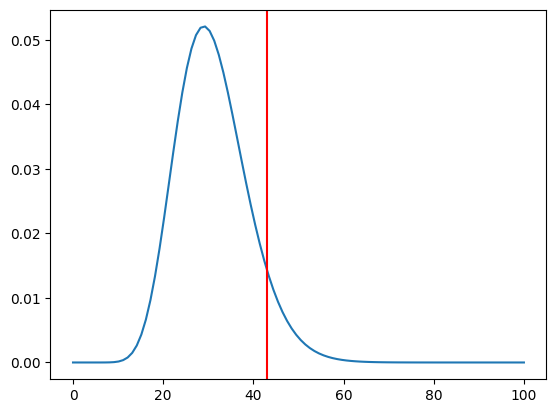

In [78]:
# plot the chi square distribution (degrees of freedom n-1) with test statistic
x = np.linspace(0, 100, 100)
plt.plot(x, chi2.pdf(x, 32-1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the standard deviation of the chosen mutual fund is greater than the average standard deviation for mid cap mutual funds at 0.05 level of significance.

# F-test for Equality of Variances

The variance of a process is an important quality of the process. A large variance implies that the process needs better control and there is opportunity to improve. 


The data (Bags.csv) includes weights for two different sets of bags manufactured from two different machines. It is assumed that the weights for two sets of bags follow normal distribution.

Do we have enough statistical evidence at 5% significance level  to conclude that there is a significant difference between the variances of the bag weights for the two machines.

Let $\sigma_1^2, \sigma_2^2$ be the variances of weights of the bags produced by two different machines.

### Null and Alternate Hypotheses :-

>$H_0:\sigma_1^2 = \sigma_2^2$

>$H_a:\sigma_1^2\neq\sigma_2^2$

In [79]:
df = pd.read_csv('Bags1.csv')
df.head()

,Machine 1,Machine 2
0,2.95,3.22
1,3.45,3.30
2,3.50,3.34
3,3.75,3.28
4,3.48,3.29


In [80]:
print('Standard Deviation of Machine 1 is',df['Machine 1'].std())
print('Standard Deviation of Machine 2 is',df['Machine 2'].std())

Standard Deviation of Machine 1 is 0.22910894589890868
Standard Deviation of Machine 2 is 0.07681991083891401


In [81]:
from scipy.stats import f
def f_test(x,y):
    x,y = np.array(x),np.array(y)
    test_stat = np.var(x, ddof=1)/np.var(y, ddof=1) # F-Statistic
    dfn, dfd = x.size-1, y.size-1                   # DoF for Numerator and Denominator
    p = f.sf(test_stat, dfn, dfd)
    p1 = p*2                                        # Converting One-Tailed to Two-Tailed
    return test_stat, p1

In [82]:
test_stat, p_value = f_test(df['Machine 1'], df['Machine 2'])
print('P-value is', p_value)

P-value is 5.0992829687467126e-06


As the p-value is much smaller than the level of significance, the null hypothesis can be rejected. Hence, we have enough statistical evidence to conclude that there is a difference between the bag weights for the two machines at 0.05 significance level.

# Chi-Square Test for Independence

The beverage preference data for different age groups has given in the Beverage.csv file.

Do we have enough statistical evidence to conclude that beverage preference depend on age.

### Null and Alternate Hypotheses :-

>$H_0:$ Beverage preference is independent of age.

>$H_a:$ Beverage preference depends on age.

In [83]:
df = pd.read_csv('Beverage.csv')
df

,Age,Tea/Coffee,Soft Drink,Others
0,21 - 34,25,90,20
1,35 - 55,40,35,25
2,> 55,24,15,30


The above table is called Contingency Table.

In [84]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(df.drop('Age', axis = 1))
print('The p-value is', p_value)

The p-value is 5.410957050304089e-10


As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that beverage preference is not independent of age at 5% significance level.

# One-way Anova Test

Traffic management inspector in a certain city wants to understand whether carbon emissions from different cars are different. The inspector has reasons to believe that Fuel type may be the factors responsible for differences in carbon emission.

For this purpose, the inspector has taken random samples from all registered cars on the road in that city and would like to test if the amount of carbon emission release depends on fuel type at 5% significance level.

In [85]:
df = pd.read_csv('AOVData.csv')
df.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


In [86]:
df['fuel_type'].value_counts()

fuel_type
Petrol    179
LPG       170
E85       161
Name: count, dtype: int64

Let $\mu_1, \mu_2, \mu_3$ be the means of carbon dioxide emissions for fuel type E85, LPG and Petrol respectively.

### Null and Alternate Hypotheses :-

>$H_0: \mu_1 = \mu_2 = \mu_3$

>$H_a: $ At least one carbon emission level is different from the rest.

In [87]:
df.groupby('fuel_type')['co_emissions'].mean()

fuel_type
E85       338.124534
LPG       363.744412
Petrol    371.722961
Name: co_emissions, dtype: float64

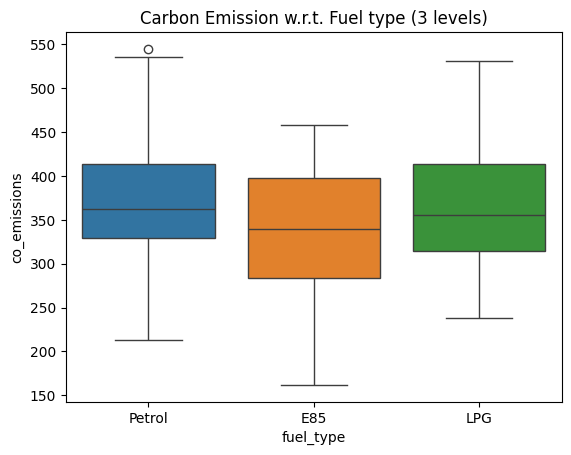

In [88]:
sns.boxplot(df, x='fuel_type', y='co_emissions', hue='fuel_type')
plt.title('Carbon Emission w.r.t. Fuel type (3 levels)')
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Carbon emission follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Carbon emission does not follow a normal distribution

In [89]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(df['co_emissions'])
print('The p-value is', p_value)

The p-value is 0.49750789999961853


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [90]:
from scipy.stats import levene
test_stat, p_value = levene(df[df['fuel_type'] == 'Petrol']['co_emissions'], df[df['fuel_type'] == 'E85']['co_emissions'],
                            df[df['fuel_type'] == 'LPG']['co_emissions'])

print('The p-value is', p_value)

The p-value is 0.19437768490117


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [91]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(df[df['fuel_type'] == 'Petrol']['co_emissions'], df[df['fuel_type'] == 'E85']['co_emissions'],
                            df[df['fuel_type'] == 'LPG']['co_emissions'])

print('The p-value is',p_value)

The p-value is 8.274439764368132e-06


As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one carbon emission level is different from the rest at 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

# Multiple Comparison test(Tukey HSD)

### Null and Alternate Hypotheses :-

$H_0 : \mu_{1}=\mu_{2} \text{ }\text{and}\text{ } \mu_{2}=\mu_{3} \text{ }\text{and}\text{ } \mu_{3}=\mu_{1}$

$H_a : \mu_{1}\neq\mu_{2} \text{ }\text{or}\text{ } \mu_{2}\neq\mu_{3} \text{ }\text{or}\text{ } \mu_{3}\neq\mu_{1}$

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df['co_emissions'], groups = df['fuel_type'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6843 42.5554   True
   E85 Petrol  33.5984    0.0 16.8712 50.3256   True
   LPG Petrol   7.9785 0.4916 -8.5139  24.471  False
----------------------------------------------------


As the p-value for comparing the mean carbon emissions for the pair E85-LPG and E85-Petrol is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean carbon emission for Petrol and LPG is similar but emission for fuel type E85 is significantly different from LPG and Petrol.